### Clinical NLP - Named Entity Recognition of Clinical & BioMedical Text
+ scispacy
+ med7
+ spark-nlu : Clinical (license)
+ cTakes
+ etc



In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load Dataset
df = pd.read_csv("medical_dataset.csv")

In [14]:
df.head()

,label,description,text
0,Other,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr..."
1,Other,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb..."
2,Other,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ..."
3,Internal Medicine,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
4,Internal Medicine,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...


In [16]:
df.iloc[1]['text']

"PAST MEDICAL HISTORY:, He has difficulty climbing stairs, difficulty with airline seats, tying shoes, used to public seating, and lifting objects off the floor.  He exercises three times a week at home and does cardio.  He has difficulty walking two blocks or five flights of stairs.  Difficulty with snoring.  He has muscle and joint pains including knee pain, back pain, foot and ankle pain, and swelling.  He has gastroesophageal reflux disease.,PAST SURGICAL HISTORY:, Includes reconstructive surgery on his right hand 13 years ago.  ,SOCIAL HISTORY:, He is currently single.  He has about ten drinks a year.  He had smoked significantly up until several months ago.  He now smokes less than three cigarettes a day.,FAMILY HISTORY:, Heart disease in both grandfathers, grandmother with stroke, and a grandmother with diabetes.  Denies obesity and hypertension in other family members.,CURRENT MEDICATIONS:, None.,ALLERGIES:,  He is allergic to Penicillin.,MISCELLANEOUS/EATING HISTORY:, He has b

#### Using SciSpacy
+ bc5cdr :chemical disease relation

In [17]:
!pip install spacy

In [18]:
# Using Scispacy
!pip install scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bc5cdr_md-0.4.0.tar.gz

  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bc5cdr_md-0.4.0.tar.gz (125.1 MB)


In [19]:
# Load Pkgs
import spacy 
import scispacy

In [20]:
# Create NLP Object
sci_nlp = spacy.load('en_ner_bc5cdr_md')

In [21]:
# Components of the NLP Object
sci_nlp.component_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer', 'parser', 'ner']

In [22]:
# Explore Entities
sci_nlp.get_pipe('ner').labels

('CHEMICAL', 'DISEASE')

In [23]:
x = df.iloc[1]['text']

In [24]:
x

"PAST MEDICAL HISTORY:, He has difficulty climbing stairs, difficulty with airline seats, tying shoes, used to public seating, and lifting objects off the floor.  He exercises three times a week at home and does cardio.  He has difficulty walking two blocks or five flights of stairs.  Difficulty with snoring.  He has muscle and joint pains including knee pain, back pain, foot and ankle pain, and swelling.  He has gastroesophageal reflux disease.,PAST SURGICAL HISTORY:, Includes reconstructive surgery on his right hand 13 years ago.  ,SOCIAL HISTORY:, He is currently single.  He has about ten drinks a year.  He had smoked significantly up until several months ago.  He now smokes less than three cigarettes a day.,FAMILY HISTORY:, Heart disease in both grandfathers, grandmother with stroke, and a grandmother with diabetes.  Denies obesity and hypertension in other family members.,CURRENT MEDICATIONS:, None.,ALLERGIES:,  He is allergic to Penicillin.,MISCELLANEOUS/EATING HISTORY:, He has b

In [25]:
docx = sci_nlp(x)

In [26]:
# Extract all entities
for ent in docx.ents:
  print(ent.text, ent.label_)

snoring DISEASE
muscle and joint pains DISEASE
knee pain DISEASE
back pain DISEASE
ankle pain DISEASE
swelling DISEASE
gastroesophageal reflux disease.,PAST DISEASE
Heart disease DISEASE
stroke DISEASE
diabetes DISEASE
obesity DISEASE
hypertension DISEASE
allergic DISEASE
head, neck, heart, lungs, GI DISEASE
chest pain DISEASE
coronary artery disease DISEASE
congestive heart failure DISEASE
arrhythmia DISEASE
atrial fibrillation DISEASE
cholesterol CHEMICAL
pulmonary embolism DISEASE
CVA DISEASE
venous insufficiency DISEASE
thrombophlebitis DISEASE
asthma, shortness of breath DISEASE
COPD DISEASE
emphysema DISEASE
apnea DISEASE
diabetes DISEASE
osteoarthritis DISEASE
rheumatoid arthritis DISEASE
hiatal hernia DISEASE
ulcer disease DISEASE
gallstones DISEASE
infected gallbladder DISEASE
pancreatitis DISEASE
fatty liver DISEASE
hepatitis DISEASE
hemorrhoids DISEASE
bleeding DISEASE
incontinence DISEASE
urinary stress incontinence DISEASE
cancer DISEASE
cellulitis DISEASE
pseudotumor DISE

In [27]:
### Visualize
from spacy import displacy

In [28]:
displacy.render(docx,style='ent',jupyter=True)

In [30]:
# Fxn to extract all the disease
def extract_diseases(text):
  docx = sci_nlp(text)
  results = [ent.text for ent in docx.ents  if ent.label_ == 'DISEASE']
  return results

In [31]:
df['diseases'] = df['text'].apply(lambda x:extract_diseases(x))

In [32]:
df.head()

,label,description,text,diseases
0,Other,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","[allergies, allergies, allergic rhinitis, alle..."
1,Other,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","[snoring, muscle and joint pains, knee pain, b..."
2,Other,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","[weight loss, weight loss, weight loss, apnea,..."
3,Internal Medicine,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","[atrial enlargement, mitral and tricuspid regu..."
4,Internal Medicine,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"[ventricular outflow tract, hyperdynamic left ..."


In [35]:
df[df['label'] == 'Surgery']['diseases'].to_list()

[[],
 ['Prostate', 'prostate cancer', 'urinary retention'],
 [],
 [],
 [],
 ['bleeding', 'bleeding', 'bleeding'],
 ['bladder neck obstruction',
  'granulomatous disease',
  'cysto',
  'prostate',
  'hematuria',
  'benign bladder neck obstruction',
  'voiding, bladder neck obstruction',
  'cysto, enlarged prostate',
  'prostate',
  'neck obstruction',
  'prostate'],
 ['umbilical hernia', 'hernia'],
 ['anatomic abnormality'],
 ['bleeding', 'pain', 'azoospermia'],
 ['dysuria',
  'hematuria',
  'fever',
  'chills',
  'urinary incontinence',
  'incontinence',
  'incontinence',
  'vaginal prolapse',
  'ascites',
  'abdominal distention',
  'urinary retention',
  'dysuria',
  'hematuria',
  'vaginal prolapse',
  'urinary, retention',
  'prolapse',
  'incontinence'],
 ['acute renal insufficiency',
  'dehydration',
  'urinary retention',
  'obstructive BPH',
  'blurred vision',
  'nasal congestion',
  'constipation',
  'chest pain',
  'shortness of breath',
  'End-stage renal disease',
  'Decea

In [36]:
# Get Most commonest disease for each category
def get_commonest_diseases(x):
  disease_list = df[df['label'] == x]['diseases'].tolist()
  disease_list = [i for j in disease_list for i in j]
  return disease_list

surgery_diseases = get_commonest_diseases('Surgery')
medicine_diseases = get_commonest_diseases('Internal Medicine')
records_diseases = get_commonest_diseases('Medical Records')
other_diseases = get_commonest_diseases('Other')


In [37]:
!pip install wordcloud

In [45]:
# Fxn to plot the disease
from wordcloud import WordCloud
def plot_wordcloud(text):
  mywordcloud = WordCloud().generate(text)
  plt.figure(figsize=(20,10))
  plt.imshow(mywordcloud,interpolation='bilinear')
  plt.axis('off')
  plt.show()

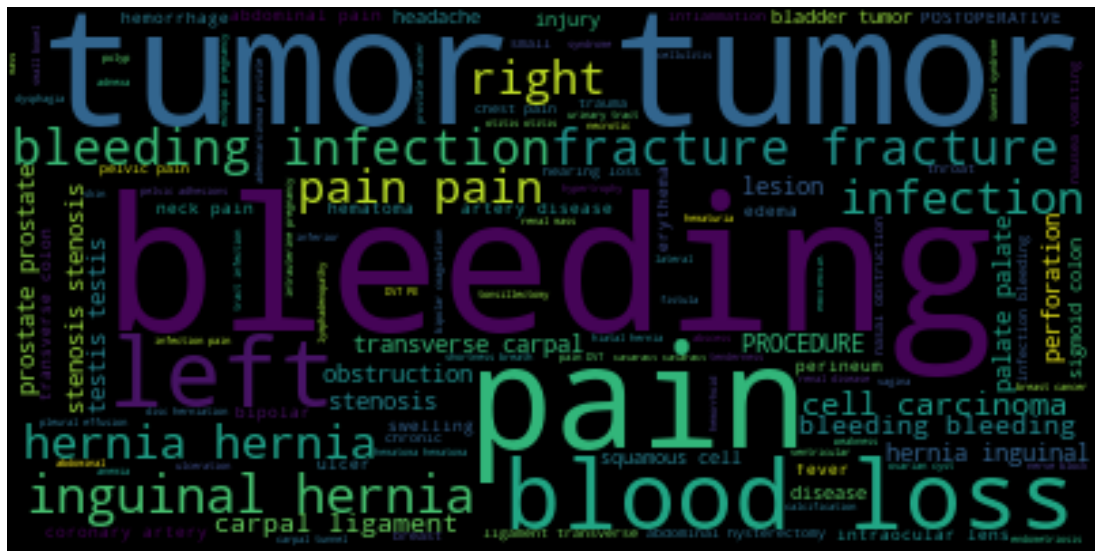

In [46]:
plot_wordcloud(' '.join(surgery_diseases))

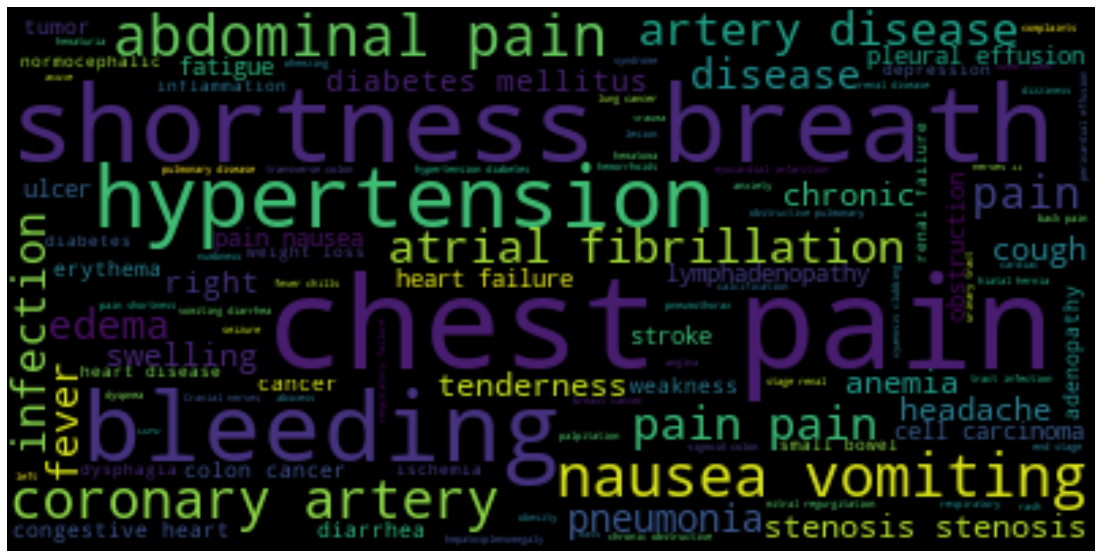

In [47]:
plot_wordcloud(' '.join(medicine_diseases))

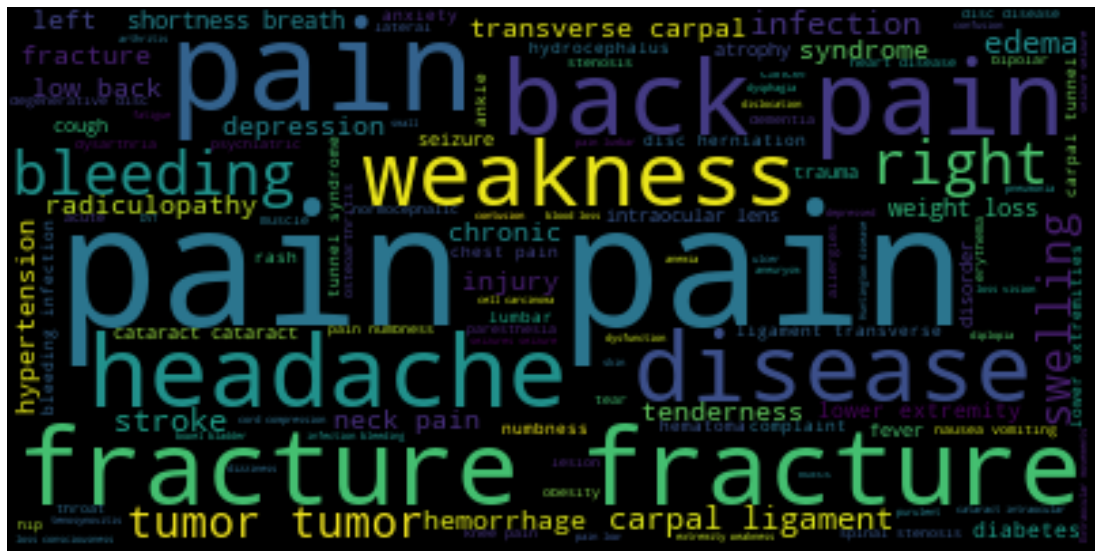

In [48]:
plot_wordcloud(' '.join(other_diseases))

In [40]:
# Labels
df['label'].unique()

array(['Other', 'Internal Medicine', 'Surgery', 'Medical Records'],
      dtype=object)

#### Using Med7

In [29]:
!pip install spacy==2.3.5
!pip install https://huggingface.co/kormilitzin/en_core_med7_lg/resolve/main/en_core_med7_lg-any-py3-none-any.whl


     |████████████████████████████████| 10.4 MB 10.1 MB/s 
     |████████████████████████████████| 184 kB 67.3 MB/s 
     |████████████████████████████████| 1.0 MB 50.8 MB/s 
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.2
    Uninstalling srsly-2.4.2:
      Successfully uninstalled srsly-2.4.2
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.6
    Uninstalling catalogue-2.0.6:
      Successfully uninstalled catalogue-2.0.6
  Attempting uninstall: thinc
    Found existing installation: thinc 8.0.13
    Uninstalling thinc-8.0.13:
      Successfully uninstalled thinc-8.0.13
  Attempting uninstall: spacy
    Found existing installation: spacy 3.0.7
    Uninstalling spacy-3.0.7:
      Successfully uninstalled spacy-3.0.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scispacy 0.4.0 requires spacy<3.1.0,>=3

     |████████████████████████████████| 790.7 MB 4.6 kB/s 
     |████████████████████████████████| 5.9 MB 13.5 MB/s 
  Using cached thinc-8.0.13-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (628 kB)
  Using cached catalogue-2.0.6-py3-none-any.whl (17 kB)
  Using cached srsly-2.4.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (451 kB)
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.5
    Uninstalling thinc-7.4.5:
      Successfully uninstalled thinc-7.4.5
  Attempting uninstall: spacy
    Found existing installation: spacy 2.3.5
    Uninstalling spacy-2.3.5:
      Successfully uninstalled spacy-2.3.5
ERROR: pip's dependency resolv

In [3]:
# Load pkg
import spacy
med7_nlp = spacy.load('en_core_med7_lg')

In [4]:
x1 = df.iloc[1]['text']

In [5]:
# Components
med7_nlp.component_names

['tok2vec', 'ner']

In [6]:
# Entitites
med7_nlp.get_pipe('ner').labels

('DOSAGE', 'DRUG', 'DURATION', 'FORM', 'FREQUENCY', 'ROUTE', 'STRENGTH')

In [10]:
docx2 = med7_nlp(x1.lower())

In [8]:
from spacy import displacy

In [11]:
displacy.render(docx2,style='ent',jupyter=True)

In [12]:
#### Thanks For Watching
#### Jesus Saves
#### Jesse E.Agbe(JCharis)